In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# understanding softmax

g = torch.Generator().manual_seed(2147483647)

In [8]:
# lets generate 10 number between 1 and 100, 
# lets assume they are the counts of occurance 
# of some event corrsponding to the position indicated by index i
inputs = torch.randint(0, 10, (10,), generator=g)
print(inputs)
# so here the first event E1 occured 19 times and second occured 63 times
# lets do a simple normalization by scaling down by a factor (maximum value in the list)
inputs = inputs / inputs.max()

tensor([7, 1, 8, 1, 9, 0, 6, 3, 6, 4])


In [9]:
# the scaled down inputs are the following 
inputs

tensor([0.7778, 0.1111, 0.8889, 0.1111, 1.0000, 0.0000, 0.6667, 0.3333, 0.6667,
        0.4444])

In [10]:
# Lets say the inputs given here are logarithms of some actual counts then we get the actual counts by exponentiating
# the inputs
counts = inputs.exp()
print("The scaled down counts are ", counts)
probs = counts / counts.sum()
print("Probabilities are")
print(probs)

# lets use the softmax function on the inputs
print("Probabilities using softmax function")
probs2 = inputs.softmax(dim=0)
print(probs2)

# Here you can see probability calculated by softmax is exactly same as probs, therefore we can use softmax function to
# easily calculate probabilities of number of occurances of n number of counts. Softmax will take care of scaling down 
# exponentiating and calculating probabilities.

The scaled down counts are  tensor([2.1766, 1.1175, 2.4324, 1.1175, 2.7183, 1.0000, 1.9477, 1.3956, 1.9477,
        1.5596])
Probabilities are
tensor([0.1250, 0.0642, 0.1397, 0.0642, 0.1561, 0.0574, 0.1119, 0.0801, 0.1119,
        0.0896])
Probabilities using softmax function
tensor([0.1250, 0.0642, 0.1397, 0.0642, 0.1561, 0.0574, 0.1119, 0.0801, 0.1119,
        0.0896])


In [132]:
# in a real scenario the inputs may contain -ve numbers and then we won't be able to say that the inputs are 
# number of occurance of corresponding events. This is because number of occurances can't be -ve.
inputs2 = torch.linspace(-1, 1, 10)
print(inputs2)

tensor([-1.0000, -0.7778, -0.5556, -0.3333, -0.1111,  0.1111,  0.3333,  0.5556,
         0.7778,  1.0000])


In [133]:
# But if we say that these inputs are logarithm of actual counts 
# then the actual counts will be exponents of these values
inputs2.exp()

tensor([0.3679, 0.4594, 0.5738, 0.7165, 0.8948, 1.1175, 1.3956, 1.7429, 2.1766,
        2.7183])

But a simple question can be how do we get -ve value for a +ve count ? A count will not be a fraction therefore log can't be -ve. For this problem you can imagine these fractional values `(ie, inputs2.exp())` as relative strength actual counts, they are say a scale down version of actual counts. Lets say we divide each count by largest count in the sequence we get the relative strength with respect to the largest value. Therefore we get fractional values for each value in the list.

`The actual probability isn't affected whther you scale up or down. So the inputs we say are logarithm of  scale down version of actual counts aka logits.`

From the following graph we can see the graph of exponent function.

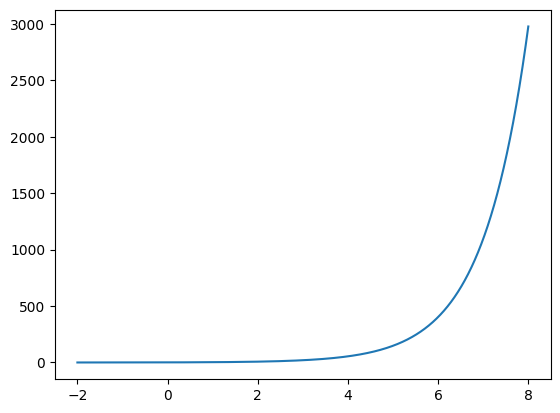

In [92]:
xs = torch.arange(-2, 8, 0.001)
ys = xs.exp()
plt.plot(xs, ys)

Now we have these scaled down counts and we can calculate the probability using softmax as follows.

In [137]:
outputs = F.softmax(inputs2, dim=0)
print(outputs)
print(outputs.sum())

tensor([0.0302, 0.0378, 0.0472, 0.0589, 0.0736, 0.0919, 0.1147, 0.1433, 0.1789,
        0.2235])
tensor(1.0000)


In [182]:
# manual softmax 
t = torch.tensor([0,1,2,3,4,5,100]).float()
exp = t.exp()
print("Exponents=", exp)
print("Probs=", exp/exp.sum())

# the softmax function also avoid nan values becuase it offsets and avoid the infinite values in the exponents.
print(t.softmax(dim=0))

Exponents= tensor([  1.0000,   2.7183,   7.3891,  20.0855,  54.5981, 148.4132,      inf])
Probs= tensor([0., 0., 0., 0., 0., 0., nan])
tensor([3.7835e-44, 1.0089e-43, 2.7465e-43, 7.4689e-43, 2.0305e-42, 5.5211e-42,
        1.0000e+00])
